In [6]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [7]:
import feather

In [5]:
from fastai.imports import *
from fastai.structured import *
from sklearn import *
from sklearn.tree import export_graphviz
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor
from IPython.display import display, Image
from sklearn import metrics

?display
- so the ?( function name ) will give you the use of that function
- ?? (function name) will give you the source code of the function


In [14]:
PATH ="courses/ml1/data/bulldozers/"

The above line gives the path to the data.

# OUR #GOAL# IS TO PREDICT SALES PRICE BY ANALYSING DATA RELATED TO THE BULLDOZERS.


- PICKING AN AREA WHERE YOU ARE NOT REALLY INFORMATED IS GOOD AS YOU USE ML TO GET INSIGHTS FROM THE DATA ALSO.


- LIKE HERE I DON'T KNOW A THING ABOUT BULLDOZERS...

In [15]:
!ls 
# ALTHOUGH IT IS NOT WORKING HERE, THIS IS USED TO USE BASH
# COMMANDS IN PYTHON


CODE-OF-CONDUCT.md    Untitled.html    environment-cpu.yml  storage
LICENSE		      Untitled.ipynb   environment.yml	    temp1
MANIFEST	      Untitled1.html   fastai		    tests
MANIFEST.in	      Untitled1.ipynb  pytest.ini	    tmp
README.md	      courses	       requirements.txt     tutorials
SalesPricePred.html   datasets	       setup.cfg
SalesPricePred.ipynb  docs	       setup.py


# Note that this is strctured data
- Columns of data with different types of data values.

PANDAS IS THE MOST IMPORTANT LIBRARY WE'RE IMPORTING HERE.
IT IS ALWAYS GONNA BE IMPORTED AS pd AND SO JEREMY HAS MADE THAT abbreviation in fastai.imports library and thus it is written there as pd


In [16]:
df_raw= pd.read_csv(f'{PATH}Train.csv',low_memory= False, parse_dates=["saledate"])
# df_raw is a dataframe with all the data.
# parse_dates = [name] means that we want to parse name as a date format.

In [17]:
name= 'Harshit'
f'Hello {name}' # the format string example

'Hello Harshit'

In [18]:
df_raw.tail().transpose()

,401120,401121,401122,401123,401124
SalesID,6333336,6333337,6333338,6333341,6333342
SalePrice,10500,11000,11500,9000,7750
MachineID,1840702,1830472,1887659,1903570,1926965
ModelID,21439,21439,21439,21435,21435
datasource,149,149,149,149,149
auctioneerID,1,1,1,2,2
YearMade,2005,2005,2005,2005,2005
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-10-25 00:00:00,2011-10-25 00:00:00


# Here we have only one dependent variable that is salesprice.
# We just are looking at the data so that we know that we have imported it correctly and stuff .
# Curse of dimensionality is not true according to Jeremy.

In [19]:
print(type(df_raw))

<class 'pandas.core.frame.DataFrame'>


- Always look for the basis of your evaluation
- Here, the evaluation of bulldozers is done on the basis of RMSLE root mean squared log error. 
    #means-> diff b/w log of prediction and log of actual price then sqaured and added them up and then root.
    

In [20]:
df_raw.SalePrice= np.log(df_raw.SalePrice)
#np is the abbreviation for your numpy library.

# since the SalePrice is a kind of a list , it can be passed
# into the np log function and it takes their log and then 
# updates in the dataframe.


In [21]:
df_raw.tail().transpose()

,401120,401121,401122,401123,401124
SalesID,6333336,6333337,6333338,6333341,6333342
SalePrice,9.25913,9.30565,9.3501,9.10498,8.95545
MachineID,1840702,1830472,1887659,1903570,1926965
ModelID,21439,21439,21439,21435,21435
datasource,149,149,149,149,149
auctioneerID,1,1,1,2,2
YearMade,2005,2005,2005,2005,2005
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-10-25 00:00:00,2011-10-25 00:00:00


# Random Forest is a universal machine learning technique which predicts either -> categorical data or continuous data.
# Continuous means predicting the actual value.
# Categorical means which category does a particular entry belong to.


In [18]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df_raw.drop('SalePrice',axis=1), df_raw.SalePrice)
# create instance of the machine learning model you want to
# create
# here , df_raw.drop method returns a new dataframe with the
# specified row or column removed. 
# here we wanted to remove the dependent variable and it was 
# a column so axis=1 means a column is to be removed.
# then the second parameter of the fit method is the dependent 
# variable that is the saleprice here.


/opt/conda/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: could not convert string to float: 'Low'

# The random forest is pretty good at everything.
- why did it blow up?
- it only wants NUMBERSSSSS. They were string types in the data so it blew up.
- convert everything to numbers.


In [22]:
add_datepart
# you would only call it once as it would remove the column 
# saledate and thus update your dataframe without that.

<function fastai.structured.add_datepart(df, fldname, drop=True, time=False)>

In [23]:
add_datepart(df_raw,'saledate')

In [24]:
df_raw.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',


# the thing to note that here is fld is a panda series not a datetime series.
# Note that-> date_time field.dt will have all those date_time attributes you wanna access in your dataframe.


so this date is not a number ->
# What is the interesting things or Columns you can pull out of the date?
- day
- week
- year
- day of the week
- is it a holiday?
- was it raining that day?
- was it a weekend?


- The above stuff is pulled out by jeremy's function add_datepart.
- It is a method of fastai's tabular library.

In [22]:
# Date part was called above .
# see it

In [23]:
??add_datepart
# there is a simple statement there extracting the field.
# it is written field = df[fieldname](the parameter)
# note that you do not use df.fieldname as it would return 
# the actual column.


Signature: add_datepart(df, fldname, drop=True, time=False)
Source:   
def add_datepart(df, fldname, drop=True, time=False):
    """add_datepart converts a column of df from a datetime64 to many columns containing
    the information from the date. This applies changes inplace.

    Parameters:
    -----------
    df: A pandas data frame. df gain several new columns.
    fldname: A string that is the name of the date column you wish to expand.
        If it is not a datetime64 series, it will be converted to one with pd.to_datetime.
    drop: If true then the original date column will be removed.
    time: If true time features: Hour, Minute, Second will be added.

    Examples:
    ---------

    >>> df = pd.DataFrame({ 'A' : pd.to_datetime(['3/11/2000', '3/12/2000', '3/13/2000'], infer_datetime_format=False) })
    >>> df

        A
    0   2000-03-11
    1   2000-03-12
    2   2000-03-13

    >>> add_datepart(df, 'A')
    >>> df

        AYear AMonth AWeek ADay ADayofweek ADayofyear

In [25]:
df_raw.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,Low,521D,...,16,3,320,False,False,False,False,False,False,1163635200
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,Low,950FII,...,26,4,86,False,False,False,False,False,False,1080259200
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,High,226,...,26,3,57,False,False,False,False,False,False,1077753600
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0,High,PC120-6E,...,19,3,139,False,False,False,False,False,False,1305763200
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0,Medium,S175,...,23,3,204,False,False,False,False,False,False,1248307200


In [25]:
 df_raw.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',


# Now the second challenge is to remove the string data type.
- this is like mapping strings to numbers.
- we search for categorical columns in the dataset by using the traincats function. It is just a category finding function which maps the strings to integers.


In [26]:
train_cats(df_raw)

- Train_cats is used to specify integer mapping to categorical variables. 

THIS IS train_cats as it is used to modify the categorical variables of the train data set.
# It is really important that you always use the same string to integer mapping in your training set and you testing set.
# This is done by the function apply_cats whose definition and stuff is given below.


In [27]:
?apply_cats

Signature: apply_cats(df, trn)
Docstring:
Changes any columns of strings in df into categorical variables using trn as
a template for the category codes.

Parameters:
-----------
df: A pandas dataframe. Any columns of strings will be changed to
    categorical values. The category codes are determined by trn.

trn: A pandas dataframe. When creating a category for df, it looks up the
    what the category's code were in trn and makes those the category codes
    for df.

Examples:
---------
>>> df = pd.DataFrame({'col1' : [1, 2, 3], 'col2' : ['a', 'b', 'a']})
>>> df
   col1 col2
0     1    a
1     2    b
2     3    a

note the type of col2 is string

>>> train_cats(df)
>>> df

   col1 col2
0     1    a
1     2    b
2     3    a

now the type of col2 is category {a : 1, b : 2}

>>> df2 = pd.DataFrame({'col1' : [1, 2, 3], 'col2' : ['b', 'a', 'a']})
>>> apply_cats(df2, df)

       col1 col2
    0     1    b
    1     2    a
    2     3    a

now the type of col is category {a : 1, b : 2}
F

In [28]:
df_raw.fiModelDesc


0               521D
1             950FII
2                226
3           PC120-6E
4               S175
5               310G
6             790ELC
7               416D
8             430HAG
9               988B
10              310G
11              D31E
12          PC200LC6
13              420D
14              214E
15              310E
16               334
17              45NX
18             302.5
19        580SUPER K
20             JS260
21              120G
22             302.5
23            966FII
24              420D
25               226
26             302.5
27          EX550STD
28              685B
29             345BL
             ...    
401095           35N
401096           35N
401097           35N
401098           35N
401099           35N
401100           35N
401101           35N
401102           35N
401103           35N
401104           35N
401105           35N
401106           35N
401107           35N
401108           35N
401109           35N
401110           35N
401111       

# There a .cat attribute which lets you use it as a categorical attribute.


In [29]:
df_raw.UsageBand.cat.categories

Index(['High', 'Low', 'Medium'], dtype='object')

So the above categories is not in good order.
# Use set_categories -> to set them correctly.
The kind of categorical variables we refer to here are categorical variables.
The below type is ordinal variable.

In [28]:
df_raw.UsageBand.cat.set_categories(["High","Medium","Low"],ordered=True, inplace = True)

# Now the last problem is the missing thing problem. 
- -1 in the categorical variables .
- Nan in some other columns

In [29]:
df_raw.isnull().sum()/len(df_raw)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.050199
YearMade                    0.000000
MachineHoursCurrentMeter    0.644089
UsageBand                   0.826391
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.342016
fiModelSeries               0.858129
fiModelDescriptor           0.820707
ProductSize                 0.525460
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.739829
Enclosure                   0.000810
Forks                       0.521154
Pad_Type                    0.802720
Ride_Control                0.629527
Stick                       0.802720
Transmission                0.543210
Turbocharged                0.802720
B

# Percentages of empty data-> 
- The isnull returns True if an entry of a column is null or empty
- Then the sum just adds up the total number of null values in a column and then I divide by the total number of rows/entries.
# This is a problem too->
- we need to get rid of this empty data.

In [31]:
os.makedirs('temp', exist_ok = True)
df_raw.to_feather('temp/mybulldozer-raw')

In [33]:
df_raw = feather.read_dataframe('temp/mybulldozer-raw')

# feather is the new format which saves your data frame in disk exactly as you would have saved in the RAM. So that you won't have to rerun all the cells when you start it again .
- If it is not installed install it -> pip install feather-format
- It's not really mandatory abhi , you just would save time by not reloading every cell again and again.

We'll replace categories with their numeric codes, handle missing continuous values, and split the dependent variable into a separate variable.

In [1]:
# we use proc_df
proc_df

NameError: name 'proc_df' is not defined

# BASICALLY proc_df does every little null removal 
and replacing them , replacing them with the median
and removing our dependent variable from your 
data frame.

In [34]:
# NO PROBLEM WITH MEANINGLESS VARIABLES LIKE 
#MODEL ID AND MODEL NO ETC. 
# MORE EXPLANATION NEXT WEEK..

In [34]:
dataf , y, nas = proc_df(df_raw,'SalePrice')

In [35]:
nas

{'auctioneerID': 2.0, 'MachineHoursCurrentMeter': 0.0}

In [37]:
y

array([11.09741, 10.95081,  9.21034, ...,  9.3501 ,  9.10498,  8.95545])

In [38]:
dataf.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor',
       'ProductSize', 'fiProductClassDesc', 'state', 'ProductGroup',
       'ProductGroupDesc', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type',
       'Ride_Control', 'Stick', 'Transmission', 'Turbocharged',
       'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower',
       'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control',
       'Tire_Size', 'Coupler', 'Coupler_System', 'Grouser_Tracks',
       'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width',
       'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type',
       'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',
       'saleI

In [39]:
dataf.head()
# everything is a number
# booleans are also treated like 0 or 1 and thus 
# numeric

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed,auctioneerID_na,MachineHoursCurrentMeter_na
0,1139246,999089,3157,121,3.0,2004,68.0,3,950,296,...,320,False,False,False,False,False,False,1163635200,False,False
1,1139248,117657,77,121,3.0,1996,4640.0,3,1725,527,...,86,False,False,False,False,False,False,1080259200,False,False
2,1139249,434808,7009,121,3.0,2001,2838.0,1,331,110,...,57,False,False,False,False,False,False,1077753600,False,False
3,1139251,1026470,332,121,3.0,2001,3486.0,1,3674,1375,...,139,False,False,False,False,False,False,1305763200,False,False
4,1139253,1057373,17311,121,3.0,2007,722.0,2,4208,1529,...,204,False,False,False,False,False,False,1248307200,False,False


In [40]:
m = RandomForestRegressor(n_jobs=-1)
#n_jobs = -1 just means that you are gonna 
# distribute the load in the cpus
m.fit(dataf,y)
m.score(dataf,y)

/opt/conda/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9830481221895075

In [41]:
# This is R^2 -> talk more next week


now we see that the graph may not be what we 
wanted and thus it may not be a perfect curve for our points.

In [42]:
#so we make a training and validation sets
def splitter(a,n):
    return ( a[:n].copy(), a[n:].copy())
vals= 12000
left_vals = len(dataf) - vals
raw_train, raw_valid =splitter(df_raw,left_vals)
X_train, X_valid= splitter(dataf,left_vals)
Y_train, Y_valid= splitter(y,left_vals)

X_train.shape,Y_train.shape, X_valid.shape

((389125, 66), (389125,), (12000, 66))

# TRYING OUT ON TRAIN AND VALIDATION SET

In [43]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), Y_train), rmse(m.predict(X_valid), Y_valid),
                m.score(X_train, Y_train), m.score(X_valid, Y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [44]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, Y_train)
print_score(m)

/opt/conda/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 1min 11s, sys: 401 ms, total: 1min 11s
Wall time: 15.4 s
[0.09057676809736945, 0.25024845716822414, 0.9828537770343635, 0.8881616396557517]


# CONCLUDED LESSON1

# hello lesson 2
# We understand the evaluation metric
# why and how random forest works
# how to speed up things
# and some of the ways to split our data to check for our accuracy first hand.


# So what is RMSLE
-> we just replaced the sale price with
the log of the sale price
-> Thus rmsle is->
 rmsle= sqrt(mean((log(actual)-log(prediced))**2))
if it was ony rmse then we would have
the log removed only the actual and
predicted values.
 Now if we optimize this we are optimizing for our rmsle.

In [45]:
df_raw.UsageBand.cat.categories


Index(['High', 'Medium', 'Low'], dtype='object')

- numerricalize is the function which actually converts the categorical variables in the corresponding numbers
- note that proc_df also handles the Na values for us by making a boolean column for if the value if null or not 

# OVERFITTING
- The fact that your model is very good for your training set but it doesn't predict very nicely for the test set.


# What is R**2 ?

What the formula does?
<img src = "images/R^2.png">



- We have actual data -> Yi's
- Then we have some average - Y-.
- SStot is like how much the data is varying or what is the simplest model you can come up with.
- that would be to just predict the values as the mean of the whole data. 
- So it is then the squared error of our "non-stupid" mean model.
- sum((Yi-Y-)**2)
- Now if we have a model that predicts Fi for Yi's.
- Then squared error is sum((Yi-Fi)**2) 
- Now if our model was perfect, then the Fi's would actually be equal to the Yi's.
- In the above case, R**2 is equal to 1 as SSres = 0.
- And if the Fi's were exactly as our mean model, the SSres would be same as the SStot and hence the model would be very less accurate.


# Range of R**2
- Interestingly, we can make our predictions be equal to infinty and thus we can observe that the R**2 of a model can be anything less than 1.

- meaning it is the ratio of how good your model is versus how good the mean model is

# VALIDATION SET->
- VERY VERY IMPORTANT
WHY?
- We need to have a validation set to have an evaluation of our model.
- NOTE- if you have a time piece in the set.
- So, if you create a validation set of a few thousand rows at random it's not gonna be good.
- Why? you need to predict the prices after the end date of your training set.
- It is really IMPORTANT THAT
# WHEN YOU HAVE A TIME PIECE IN YOUR DATA SET, YOU WANT TO HAVE A SEPARATE TIME PERIOD FOR YOUR VALIDATION SET AS YOU WANT TO PREDICT THE EG. HERE PRICES OF BULLDOZERS ON A FUTURE DATE.



- KAGGLE has a fourth data set that is used to evaluate your model apart from the public test data set.


# hyperparameters->
- We are not gonna know what they are right now but we are gonna set them for our model to TUNE it.

In [46]:
def rmse(x,y):
    return math.sqrt(((x-y)**2).mean())    

In [47]:
def print_score(m):
    res = [rmse(m.predict(X_train),Y_train) ,
          rmse(m.predict(X_valid),Y_valid),
          (m.score(X_train,Y_train)),
          (m.score(X_valid,Y_valid))]
    if hasattr(m,'oob_score_'):
        res.append(m.oob_score_)
    print(res)

In [48]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, Y_train)
print_score(m)

/opt/conda/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 1min 13s, sys: 414 ms, total: 1min 13s
Wall time: 15.5 s
[0.09032229299476778, 0.24836527772857006, 0.9829499861974992, 0.8898385271095338]


# SPEEDING THINGS UP IS IMPORTANT-
- because you would want to instantly check if your tuned parameters work or not or whether they are right or not.
 - So> we pass in a subset parameter
 

In [49]:
df_trn, y_trn , NAS = proc_df(df_raw, 'SalePrice', subset = 30000)
X_train, _ = splitter(df_trn,20000)
Y_train, _ = splitter(y_trn,20000)


- the '_' variable grabs the rest of the data that you dont't want.
- note that still the validation set stays the same.


In [50]:
m = RandomForestRegressor(n_estimators=1,max_depth=3,bootstrap=False,n_jobs=-1)
%time m.fit(X_train,Y_train)
print_score(m)

CPU times: user 632 ms, sys: 4.48 ms, total: 637 ms
Wall time: 193 ms
[0.5197726295827011, 0.5839497334706322, 0.4123263938069237, 0.39102578663887955]


- n_estimators- the number of trees
- max_depth- maximum depth of each of the trees
- bootstrap means the randomization factor of the tree, it is a boolean variable.
- <b> Bootstrapping </b> means that you are picking up all of your rows with replacement so you end up picking up 63.2% of your rows when you pick them for a certain random forest.



- Random forest creates splits on the basis 
- What is the single best split  is that you can do?
- Which split point?
- POINT 1->
- Try all the possible columns and all the possible splits corresponding to the values filled into the columns.
eg. if we have a column of years from 2000-2010
we would split into-
year <2001 and year >=2001
year <2002 and year >=2002
...
and then for each split we would calculate the rmse and then see which ones have the smallest rmse and split them according to them.

-> The value is the average of the log of the saleprice of the column considered. 
-> So the value is the average of the dependent variabe in that sub-group.

-> Here the coupler system was ' the ' best column according to which the rmse were minimum.
It is the best split.

# very important-
- The mse is calculated on the model that what if we predicted the average . Like in the root node we just predict the average for all and then calculate the mse.
- For the coupler system = true then, we calculate the average of the items which have coupler system = true and then predict that as the value and then check the mse.
- then we see coupler = true, yearmade<=1986.5 and calc the average and then predict and then calculate average and so on and so forth.



## When is it gonna stop?
- when either the max depth is reached or each of the leaf nodes have a single item in them.











In [51]:
export_graphviz

<function sklearn.tree.export.export_graphviz(decision_tree, out_file=None, max_depth=None, feature_names=None, class_names=None, label='all', filled=False, leaves_parallel=False, impurity=True, node_ids=False, proportion=False, rotate=False, rounded=False, special_characters=False, precision=3)>

The below code just prints put the tree

In [52]:
#draw_tree(m.estimators_[0], df_trn, precision=4)

In [53]:
m = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
m.fit(X_train,Y_train)
print_score(m)

[7.105427357601002e-17, 0.47215318746344, 1.0, 0.6018801554551827]


# The thing to note
- here we didn't give any depth to the tree, we just let it go.
- So, it went down to the deepest levels and then obviosult it's gonna predict accurately as all the leaves have a single sample in them or the sample is not in the leaf.
Hence, r^2 for the training set is coming perfect.


# How to improve?
- Forestsssssssssssssssssssss.
# What is bagging?
- What if we created 5 different trees which were not correlated with each other, then all the average insights of the models give a good guess for our model.
- These 5 models would have found different insights from the data.
- Averaging the models is called the ensemble.
- Now let us have a subset of a data.
- Then pick different random samples of the data and make deep, massively overfit trees.
- what this does is each of these trees is overfit to a very high order but each of the trees' errors are RANDOM. This means, on average these tree errors average out to "zero".


- The above definition is the Random Forest.
- Random forest is simply a way of bagging different trees.
- Now sklearn has by default 10 trees in its source code.
- So it just makes 10 trees.
- for each of the trees, data is passed down upto one leaf node then its average value is taken and then this average value is taken across all the trees and thus we take average of this average for all the trees and we have a prediction.
- Now we train it with 10 trees.

In [85]:
m =RandomForestRegressor(n_estimators=15,n_jobs=-1)
m.fit(X_train,Y_train)
print_score(m)
# doing this on the random subset of
# 20000

[0.10433817960212209, 0.35798689531351874, 0.9763192265213725, 0.7711334980740622]


# Now, we look at how to tune the hyperparameters- > no. of trees.
- One thing to note is while selecting random samples from our subset, what sklearn does it picks out all the n rows with replacement and that is called bootstrapping and on average 63.2% rows are picked .
- can be derived through probability and calculus - you can look into it by searching 63.2% sampling on google.
- we pick out n rows with replacement.


# Which variables matter the most is the goal of our model.
- suppose we have 100 variables and 5 are good and 95 are meaningless and random.
- If you do knn on it you would get meaningless neighbours as 95 are random.
- The entire purpose is that which variables are important and which aren't.
- An effective ML model is accurate at training set and then it generalizes well to new data.
- In bagging you want to be as predicting as possible inside themselves but they want to be uncorrelated trees.
- What actually is uncorrelated?
    #Suppose i build a 1000 trees on 10 data points. That means it is quite likely that each tree is gonna be having different predictions and then they would have very less correlation with each other.
- How to find the end average across the multiple trees.
- okay-> take a row, predict through 1 - note it, take the same row predict through 2- note it, ...
- at last, take the average of the values across the number of trees.

    

In [86]:
    preds = np.stack(t.predict(X_valid) for t in m.estimators_)
# what this preds variable stores is
# the predictions
preds[:,0], np.mean(preds[:,0]),Y_valid[0] # Y_valid means actual


(array([9.61581, 9.71112, 9.15905, 9.76996, 8.9872 , 9.39266, 8.92266, 9.10498, 9.10498, 9.10498, 9.10498,
        9.25913, 9.10498, 9.10498, 8.9872 ]),
 9.228976528076497,
 9.104979856318357)

In [87]:
# in the above representation Y_valid[0]
# was the actual.
(preds.shape)



(15, 12000)

In [1]:
# the number means we have 10 rows, 
# why 10? 10 trees.
# why 12000 -> 12000 rows in validation set


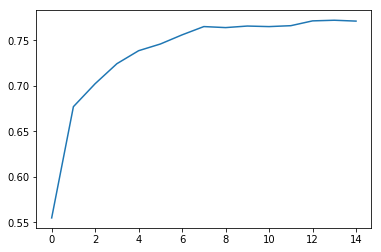

In [99]:
plt.plot([metrics.r2_score(Y_valid,np.mean(preds[:i+1],axis=0)) for i in range(15)]);  

In [89]:
# my r2 improved at estimators =15

In [90]:
m = RandomForestRegressor(n_estimators=20,n_jobs=-1)
m.fit(X_train,Y_train)
print_score(m)

[0.10129550365521277, 0.3521594461925966, 0.9776802302933303, 0.7785240065330635]


In [91]:
m = RandomForestRegressor(n_estimators=40,n_jobs=-1)
m.fit(X_train,Y_train)
print_score(m)

[0.09649998785735785, 0.3498345487025443, 0.9797435241600039, 0.7814386482703772]


In [92]:
m = RandomForestRegressor(n_estimators=100,n_jobs=-1)
m.fit(X_train,Y_train)
print_score(m)

[0.09315940480598825, 0.3498497011622133, 0.9811217043461377, 0.7814197146699042]


In [97]:
m = RandomForestRegressor(n_estimators=300,n_jobs=-1)
m.fit(X_train,Y_train)
print_score(m)

[0.09164576507589096, 0.3470307714334341, 0.9817301839255878, 0.784927964549752]


# out of bag score
- sometimes you have a small data set
- can't split into validation and train.
- So the basis of random forest is randomness right. So, for each 'estimator' we would have rows that are not selected and thus FOR that tree -> those rows can be treated as the validation set for THAT TREE.
- So now to calculate the values you can take this for the rows which weren't in the actual tree and so on and so forth.


In [104]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train,Y_train)
print_score(m)

[0.09604759788251511, 0.35244766994420673, 0.9799330028715054, 0.7781613255654145, 0.8559083879112108]


In [110]:
df_trn, y_trn,naaa = proc_df(df_raw,'SalePrice') 
X_train, X_valid = splitter(df_trn,left_vals)
Y_train, Y_valid = splitter(y_trn,left_vals)

In [119]:
set_rf_samples(30000)


# very important 
- in your splitting of training set, you took a 30000 rows then split into 20000 for training and 10000 for validation i guess. Then the estimators or trees were getting a subset of that subset to evaluate the SalePrice.
- Now what if you had the training sample as( total- length of validation ) and each time you gave a RANDOM 30k subset to the regressor to further divide it into subsets and evaluate the saleprice.
- note that it is going to run just as fast but, the trees would be able to look at the whole data now..............
# VERY IMPORTANT.


In [120]:
m =RandomForestRegressor(n_jobs=-1, oob_score=True)
m.fit(X_train,Y_train)
print_score(m)

/opt/conda/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.22791162324694367, 0.26872544474155524, 0.8914405149275463, 0.871036873121643, 0.8739812922408409]


In [9]:
??set_rf_samples
# reset_rf_samples turns it back to 
# what it was

Signature: set_rf_samples(n)
Source:   
def set_rf_samples(n):
    """ Changes Scikit learn's random forests to give each tree a random sample of
    n random rows.
    """
    forest._generate_sample_indices = (lambda rs, n_samples:
        forest.check_random_state(rs).randint(0, n_samples, n))
File:      /notebooks/fastai/structured.py
Type:      function


In [122]:
'''m =RandomForestRegressor(n_estimators=200,n_jobs=-1, oob_score=True)
m.fit(X_train,Y_train)
print_score(m)'''

'm =RandomForestRegressor(n_estimators=200,n_jobs=-1, oob_score=True)\nm.fit(X_train,Y_train)\nprint_score(m)'

In [124]:
reset_rf_samples()

In [125]:
# so this is our all data estimate.
m =RandomForestRegressor(n_estimators=100,n_jobs=-1, oob_score=True)
m.fit(X_train,Y_train)
print_score(m)
# bhaisaaabbbbb

[0.07577451731870957, 0.23411947741880823, 0.9880000017337756, 0.9021134400904635, 0.9127594506494281]


In [126]:
# so this is our all data estimate.
m =RandomForestRegressor(n_estimators=100,min_samples_leaf=3,n_jobs=-1, oob_score=True)
m.fit(X_train,Y_train)
print_score(m)
# bhaisaaabbbbb

[0.11336030809284407, 0.23156508260965392, 0.9731430394498176, 0.904237798723405, 0.9118812867890138]


# min_samples_leaf = k 
- it is a function to tell your tree that it should stop splitting .
- what it means is if your leaf has k samples so stop splitting.
- <b> range </b> 1,3,5,10
- whenever you add up a number it generally reduces the depth of the tree by one as eg.
- if you had it = 1 and then changed to 2 then even at 2 objects in a leaf node you can stop building that node.


# max_features = k , k-> [0,1]
- what this does is take a random bunch of columns from set of columns <b> at each level </b> and then split the level according to the BEST amongst them.
- WHY THE REQUIREMENT?
- There may be a column which is quite good at predicting the prices so each random estimator would have that as its root but we want different trees right?
- so we set max_faetures as 0-1 
- eg. 0.5 is select any half of them and consider them.
- <b> max features </b> ensures that the correlation of the trees is less which is good as we want that.

In [128]:
# so this is our all data estimate.
m =RandomForestRegressor(n_estimators=90,min_samples_leaf=3,max_features=0.5,n_jobs=-1, oob_score=True)
m.fit(X_train,Y_train)
print_score(m)
# bhaisaaabbbbb

[0.11767776946715411, 0.2262571763001928, 0.9710583236918062, 0.9085775828433502, 0.9150539200772937]


 # your category description doubt solved----->
 - The random forest , if suppose it wants to pick up a certain description from a category.
 - How will it do it?
 - Let's see from an example

In [131]:
df_raw.fiProductClassDesc.cat.categories


Index(['Backhoe Loader - 0.0 to 14.0 Ft Standard Digging Depth',
       'Backhoe Loader - 14.0 to 15.0 Ft Standard Digging Depth',
       'Backhoe Loader - 15.0 to 16.0 Ft Standard Digging Depth',
       'Backhoe Loader - 16.0 + Ft Standard Digging Depth',
       'Backhoe Loader - Unidentified',
       'Hydraulic Excavator, Track - 0.0 to 2.0 Metric Tons',
       'Hydraulic Excavator, Track - 11.0 to 12.0 Metric Tons',
       'Hydraulic Excavator, Track - 12.0 to 14.0 Metric Tons',
       'Hydraulic Excavator, Track - 14.0 to 16.0 Metric Tons',
       'Hydraulic Excavator, Track - 150.0 to 300.0 Metric Tons',
       'Hydraulic Excavator, Track - 16.0 to 19.0 Metric Tons',
       'Hydraulic Excavator, Track - 19.0 to 21.0 Metric Tons',
       'Hydraulic Excavator, Track - 2.0 to 3.0 Metric Tons',
       'Hydraulic Excavator, Track - 21.0 to 24.0 Metric Tons',
       'Hydraulic Excavator, Track - 24.0 to 28.0 Metric Tons',
       'Hydraulic Excavator, Track - 28.0 to 33.0 Metric Tons',
 

In [132]:
df_raw.fiProductClassDesc.cat.codes

0         58
1         61
2         38
3          7
4         39
5          1
6         13
7          1
8         16
9         67
10         1
11        50
12        11
13         1
14         1
15         1
16        16
17        19
18        12
19         1
20        14
21        34
22        12
23        63
24         1
25        38
26        12
27        23
28        34
29        21
          ..
401095    16
401096    16
401097    16
401098    16
401099    16
401100    16
401101    16
401102    16
401103    16
401104    16
401105    16
401106    16
401107    16
401108    16
401109    16
401110    16
401111    16
401112    16
401113    16
401114    16
401115    16
401116    16
401117    16
401118    16
401119    12
401120    16
401121    16
401122    16
401123    12
401124    12
Length: 401125, dtype: int8

 - Now let us suppose the random forest wants to choose blackhoeloader 15.0-16.0 ft.
 - how does it do it?
 - well all it sees are the codes presented to it.
 - now what it does is-> it splits according to its index: like here split would be fiModelDesc <3 and fiModelDesc>=3.
 - This is how it splits as its index is 2.
 - Next we split according to fiModelDesc <2 and fiModelDesc>=2.
 - In the second split we get the fiModelDesc blackhoeloader 15.0-16.0 ft.
 - We get it....!!!!!!!!!
 

In [36]:
forest

<module 'sklearn.ensemble.forest' from '/opt/conda/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/forest.py'>